![alt text](Enunciado_1.png)

![alt text](Enunciado_2.png)

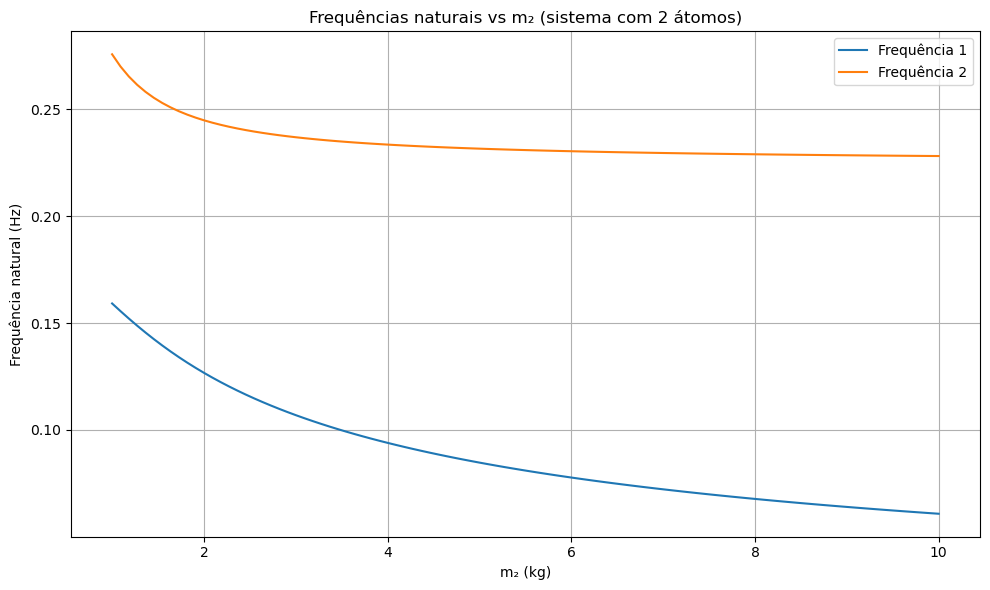

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_frequencias_modos(massas, k=1):
    """
    Calcula as frequências naturais e modos normais para uma cadeia cíclica de massas conectadas por molas.

    Parâmetros:
    - massas: lista de massas [m1, m2] ou [m1, m2, m3]
    - k: constante da mola (padrão: 1 N/m)

    Retorna:
    - frequências naturais (Hz)
    - modos normais (autovetores)
    """
    n = len(massas)
    M = np.diag(massas)  # Matriz de massas

    # Matriz de rigidez para conexões cíclicas
    K = np.zeros((n, n))
    for i in range(n):
        K[i, i] = 2 * k
        K[i, (i - 1) % n] = -k
        K[i, (i + 1) % n] = -k

    # Resolver o problema generalizado de autovalores: K v = w² M v
    w2, modos = np.linalg.eig(np.linalg.inv(M) @ K)
    w2 = np.real(w2)
    w = np.sqrt(np.abs(w2))  # Frequências naturais (rad/s)
    freq = w / (2 * np.pi)   # Converter para Hz

    # Ordenar por frequência
    idx = np.argsort(freq)
    freq = freq[idx]
    modos = modos[:, idx]

    return freq, modos

# Teste para 2 massas (m1=1, m2 variando)
m1 = 1
m2_values = np.linspace(1, 10, 100)
freqs_2atoms = []

for m2 in m2_values:
    freq, _ = calcular_frequencias_modos([m1, m2])
    freqs_2atoms.append(freq)

freqs_2atoms = np.array(freqs_2atoms)

# Plotando as frequências naturais para o caso de 2 átomos
plt.figure(figsize=(10, 6))
plt.plot(m2_values, freqs_2atoms[:, 0], label='Frequência 1')
plt.plot(m2_values, freqs_2atoms[:, 1], label='Frequência 2')
plt.xlabel('m₂ (kg)')
plt.ylabel('Frequência natural (Hz)')
plt.title('Frequências naturais vs m₂ (sistema com 2 átomos)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
